In [0]:
import numpy as np
import pandas as pd

The dependencies are now loaded, let's upload the files.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris_2.csv to iris_2 (1).csv


In [0]:
df = pd.read_csv('iris.csv', names = ['sepal length in cm' ,'sepal width in cm', 'petal length in cm','petal width in cm', 'class'], delimiter = ',', skiprows = [0])

In [4]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Shuffling the data randomly,

In [0]:
from sklearn.utils import shuffle
df = shuffle(df)

In [6]:
df = df.reset_index()
df = df.drop('index', axis = 1)
df.head()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,7.7,2.6,6.9,2.3,Iris-virginica
1,4.8,3.0,1.4,0.1,Iris-setosa
2,5.6,3.0,4.1,1.3,Iris-versicolor
3,6.3,3.3,4.7,1.6,Iris-versicolor
4,5.4,3.9,1.7,0.4,Iris-setosa


Segragating features and variables.

In [0]:
X = df.drop('class', axis = 1)
y = df['class']

In [8]:
X.shape

(150, 4)

In [9]:
X.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,7.7,2.6,6.9,2.3
1,4.8,3.0,1.4,0.1
2,5.6,3.0,4.1,1.3
3,6.3,3.3,4.7,1.6
4,5.4,3.9,1.7,0.4


In [10]:
y.head()

0     Iris-virginica
1        Iris-setosa
2    Iris-versicolor
3    Iris-versicolor
4        Iris-setosa
Name: class, dtype: object

One hot encoding the output data which is categorical.

In [0]:
y_1 = pd.get_dummies(y)

In [12]:
y_1.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_1 = scaler.fit_transform(X)
X_new = pd.DataFrame(X_1, columns = X.columns)
X_new.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,2.249683,-1.050569,1.786341,1.447956
1,-1.264185,-0.124958,-1.341272,-1.444450
2,-0.294842,-0.124958,0.194102,0.133226
3,0.553333,0.569251,0.535296,0.527645
4,-0.537178,1.957669,-1.170675,-1.050031


Finding the covariance matrix,

In [14]:
Z = X_new
cov_mat = np.dot(Z.T, Z)
cov_mat

array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 150.        ]])

In [0]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [16]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [0]:
eigen_values_col = eigen_values.reshape(eigen_values.shape[0], 1)

Finding the sparse matrix whose diagonal elements are the eigenvalues of the covariance matrix calculated above.

In [18]:
from scipy import sparse
eye = sparse.eye(eigen_values_col.shape[0]).toarray()
eigen_values_square = np.multiply(eigen_values_col, eye)
eigen_values_square

array([[436.62271256,   0.        ,   0.        ,   0.        ],
       [  0.        , 138.18313961,   0.        ,   0.        ],
       [  0.        ,   0.        ,  22.10299175,   0.        ],
       [  0.        ,   0.        ,   0.        ,   3.09115609]])

Sorting  the columns in the ascending order of the eigenvalues.

In [0]:
#def col_value_mapping(mat):
#  indices_by_cols = {}
#  for i in range(mat.shape[1]):
#    indices_by_cols_keys.append(np.argmax(mat[:, i]))
#  indices_by_cols = {k : v for k, v in zip(indices_by_cols_keys, (d_col.T).tolist()[0])}
#  return indices_by_cols
#c = col_value_mapping(d_square)
#from operator import itemgetter
#list_sorted_of_d_sqaure = sorted(c.items(), key=itemgetter(1))
#sorted_indices = [list_sorted_of_d_sqaure[i][0] for i in range(len(list_sorted_of_d_sqaure))]
#sorted_values = [list_sorted_of_d_sqaure[i][1] for i in range(len(list_sorted_of_d_sqaure))]
#def new_mat(sorted_indices, sorted_values):
  #zeros = np.zeros((len(sorted_indices), len(sorted_indices)))
  #for i in range(len(sorted_indices)):
    #zeros[sorted_indices[i], i] = sorted_values[i]
    #mat = zeros
  #return mat
#def adjust_p(p):
  #new_p = np.zeros((len(sorted_e_values_mat), len(sorted_e_values_mat)))
  #for i, j in zip(range(len(sorted_e_values_mat)), sorted_indices):
    #new_p[:, i] = p[:, j]
  #return new_p
  #adjusted_p = adjust_p(p)

In [0]:
#sorted_e_values_mat

Sorting columns of 'p' according to the columns of sorted eigen value matrix.

For finding the final matrix 'new_Z', the eigenvalues need to be sorted in descending order.

The 'new_Z' matrix is recombination of original features X and the values are weighted average of the original values, the weights are decided by the magnitude of eigen values.

In [21]:
new_Z = np.dot(Z, eigen_vectors)
new_Z

array([[ 3.30914118e+00,  2.36132010e-03, -7.06933959e-01,
         4.67561875e-02],
       [-2.22408272e+00,  7.09118158e-01, -2.23214514e-01,
         2.63061382e-03],
       [ 6.70675999e-02,  2.12620735e-01,  2.94128262e-01,
        -1.47491049e-01],
       [ 7.48715076e-01, -7.78698611e-01,  1.48656023e-01,
        -7.83010665e-02],
       [-2.07053681e+00, -1.51854856e+00,  3.06842583e-02,
         4.39877494e-03],
       [-2.43795086e+00, -2.18539162e+00, -7.93497549e-02,
        -5.10210291e-02],
       [ 1.86477791e+00, -5.55381532e-01, -7.17510683e-01,
        -2.07556768e-01],
       [-2.21111990e+00,  1.84337811e-01, -2.18624528e-01,
         1.68619769e-01],
       [-2.44571134e+00, -7.45626750e-02,  3.42197636e-01,
        -3.80965668e-02],
       [-2.20275048e+00, -1.51375028e+00, -1.36349158e-03,
         1.86631581e-01],
       [ 1.17190451e+00,  3.18896617e-01,  1.30651910e-01,
         1.25685467e-01],
       [ 1.05669143e+00,  6.36901284e-01,  1.06753234e-01,
      

In [22]:
new_Z.shape

(150, 4)

Finding proportion of variance from the eigenvalue matrix.

In [23]:
descending_order_eigenvalues = (eigen_values_col.T).tolist()[0]
descending_order_eigenvalues

[436.62271256280815, 138.18313960608376, 22.102991745764296, 3.091156085343751]

In [0]:
def proportion_of_variance():
  proportion_of_variance = []
  for e in range(len(descending_order_eigenvalues)):
    proportion_of_variance.append(descending_order_eigenvalues[e] / np.sum(descending_order_eigenvalues))
  return proportion_of_variance

In [25]:
prop_var = proportion_of_variance()
prop_var

[0.7277045209380137,
 0.2303052326768063,
 0.036838319576273836,
 0.005151926808906253]

In [26]:
cumulative_sum = np.cumsum(prop_var)
cumulative_sum

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

As it can be clearly observed, the first two variables constitute of vast majority of variance of the total data. Hence the dimensionality of the model can be reduced to 2 from 4.

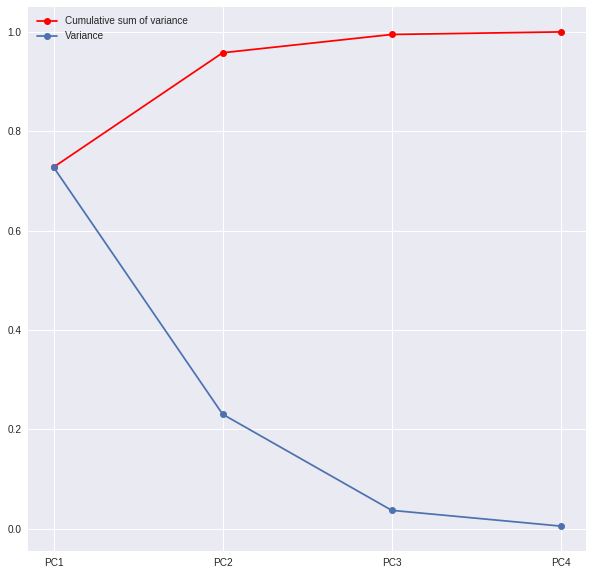

In [27]:
PC_list = ['PC1', 'PC2', 'PC3', 'PC4']
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(PC_list, cumulative_sum, color = 'red', marker = 'o', label = 'Cumulative sum of variance')
ax.plot(PC_list, prop_var, marker = 'o', label = 'Variance')
ax.legend()
plt.show()

Graphically, there is an 'elbow point' i.e sudden drop in variance after the second principal component. Hence, major contributors are PC1 and PC2. 

Let's compute the accuracy on all the features.

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC()
clf.fit(X_new, y)
pred = clf.predict(X_new)
score = accuracy_score(y, pred)
print("The score is: {}".format(score))

The score is: 0.9733333333333334


Now, let's compute ther accuracy on the first two features which are major contributes to majority of the variance.

In [29]:
new_eigen_vectors =  eigen_vectors[:, :2]
X_pca = np.dot(X_new, new_eigen_vectors)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC()
clf.fit(X_pca, y)
pred = clf.predict(X_pca)
score = accuracy_score(y, pred)
print("The score is: {}".format(score))

The score is: 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Just to see the effect of PCA, let's consider features 3 and 4 to calculate the accuracy.

In [30]:
eigen_vectors_non_pca = eigen_vectors[:, 2:]
X_non_pca = np.dot(X_new, eigen_vectors_non_pca)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC()
clf.fit(X_non_pca, y)
pred = clf.predict(X_non_pca)
score = accuracy_score(y, pred)
print("The score is: {}".format(score))

The score is: 0.5133333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


This accuracy is very low as compared to the one calculated on the basis of PCA. Thus through this experiment, we can observe that PCA can help reduce the dimensionality without a very high drop in prediction accuracy.